In [1]:
import pandas as pd

dataset = pd.read_csv('british airways.csv')
dataset

Date  Adjusted Passenger Count
0    2005-07-01                     21686
1    2005-08-01                     20084
2    2005-09-01                     20635
3    2005-10-01                     18988
4    2005-11-01                     15554
..          ...                       ...
124  2015-11-01                     19800
125  2015-12-01                     17560
126  2016-01-01                     18397
127  2016-02-01                     16230
128  2016-03-01                     18392

[129 rows x 2 columns]

In [2]:
# https://github.com/facebook/prophet/issues/1072
from fbprophet import Prophet
Prophet()

In [3]:
train_df=dataset[:115]
train_df

Date  Adjusted Passenger Count
0    2005-07-01                     21686
1    2005-08-01                     20084
2    2005-09-01                     20635
3    2005-10-01                     18988
4    2005-11-01                     15554
..          ...                       ...
110  2014-09-01                     19011
111  2014-10-01                     18321
112  2014-11-01                     15979
113  2014-12-01                     16084
114  2015-01-01                     15889

[115 rows x 2 columns]

In [4]:
test_df=dataset[115:129]
test_df

Date  Adjusted Passenger Count
115  2015-02-01                     14372
116  2015-03-01                     17304
117  2015-04-01                     19594
118  2015-05-01                     22075
119  2015-06-01                     21315
120  2015-07-01                     21078
121  2015-08-01                     22544
122  2015-09-01                     21341
123  2015-10-01                     22169
124  2015-11-01                     19800
125  2015-12-01                     17560
126  2016-01-01                     18397
127  2016-02-01                     16230
128  2016-03-01                     18392

In [5]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = train_df['Date']
train_dataset['y']= train_df['Adjusted Passenger Count']
train_dataset.head(115)

ds      y
0    2005-07-01  21686
1    2005-08-01  20084
2    2005-09-01  20635
3    2005-10-01  18988
4    2005-11-01  15554
..          ...    ...
110  2014-09-01  19011
111  2014-10-01  18321
112  2014-11-01  15979
113  2014-12-01  16084
114  2015-01-01  15889

[115 rows x 2 columns]

In [6]:
from fbprophet.plot import plot_plotly

import plotly.offline as py
py.init_notebook_mode()

In [7]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future= prophet_basic.make_future_dataframe(periods=14)
future.tail(15)

ds
114 2015-01-01
115 2015-01-02
116 2015-01-03
117 2015-01-04
118 2015-01-05
119 2015-01-06
120 2015-01-07
121 2015-01-08
122 2015-01-09
123 2015-01-10
124 2015-01-11
125 2015-01-12
126 2015-01-13
127 2015-01-14
128 2015-01-15

In [9]:
forecast=prophet_basic.predict(future)

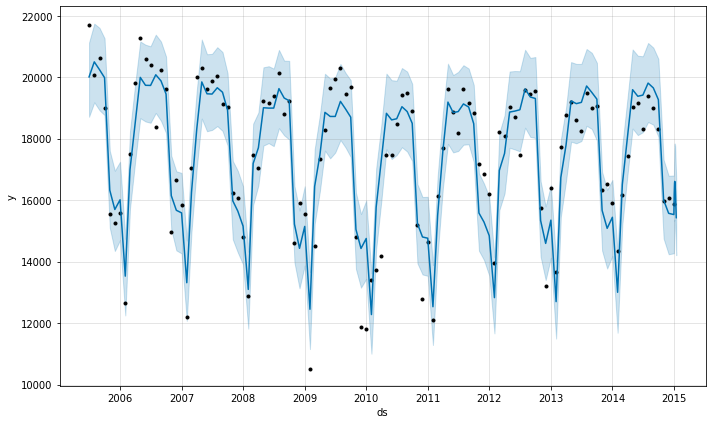

In [10]:
fig1 =prophet_basic.plot(forecast)

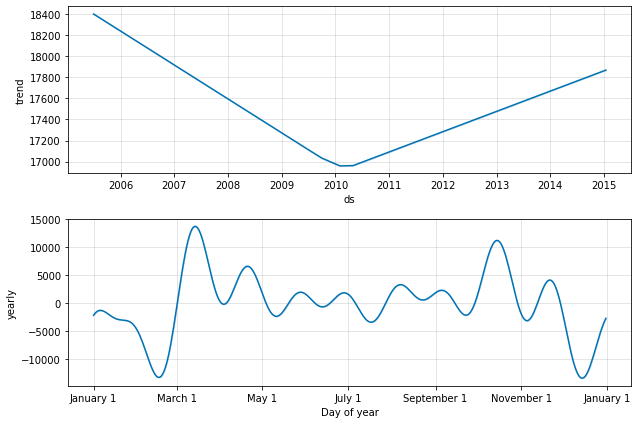

In [11]:
fig1 = prophet_basic.plot_components(forecast)

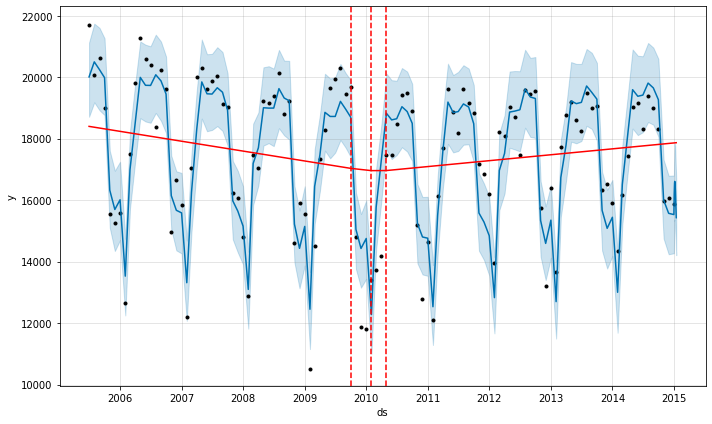

In [12]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [13]:
prophet_basic.changepoints

4    2005-11-01
7    2006-02-01
11   2006-06-01
15   2006-10-01
18   2007-01-01
22   2007-05-01
25   2007-08-01
29   2007-12-01
33   2008-04-01
36   2008-07-01
40   2008-11-01
44   2009-03-01
47   2009-06-01
51   2009-10-01
55   2010-02-01
58   2010-05-01
62   2010-09-01
66   2011-01-01
69   2011-04-01
73   2011-08-01
76   2011-11-01
80   2012-03-01
84   2012-07-01
87   2012-10-01
91   2013-02-01
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


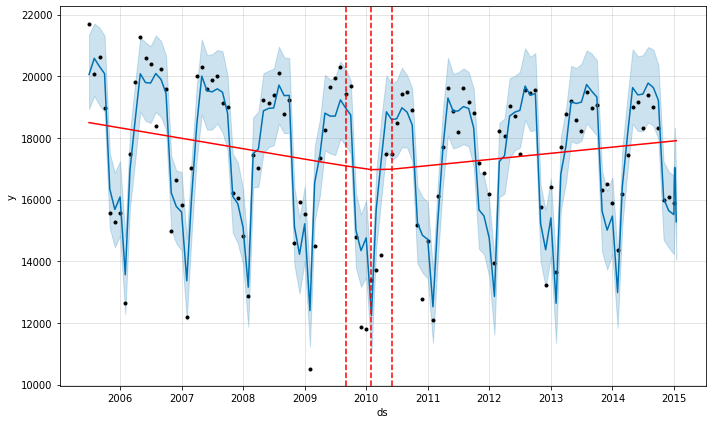

In [14]:
pro_change= Prophet(n_changepoints=20)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

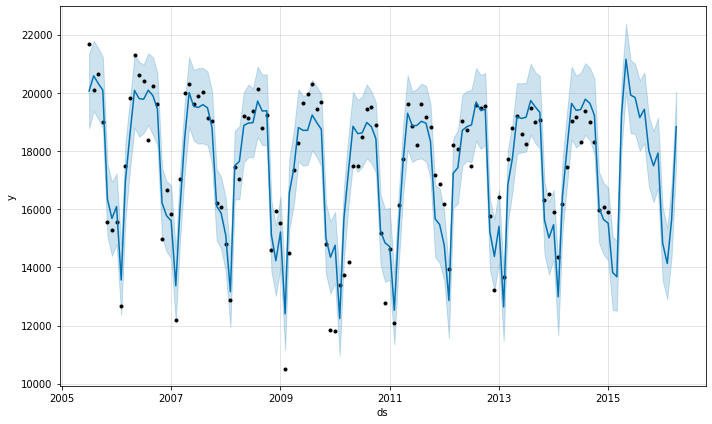

In [15]:
# pro_change.fit(train_dataset)
future_data = pro_change.make_future_dataframe(periods=15, freq = 'm')
 
#forecast the data for future data
forecast_data = pro_change.predict(future_data)
pro_change.plot(forecast_data);

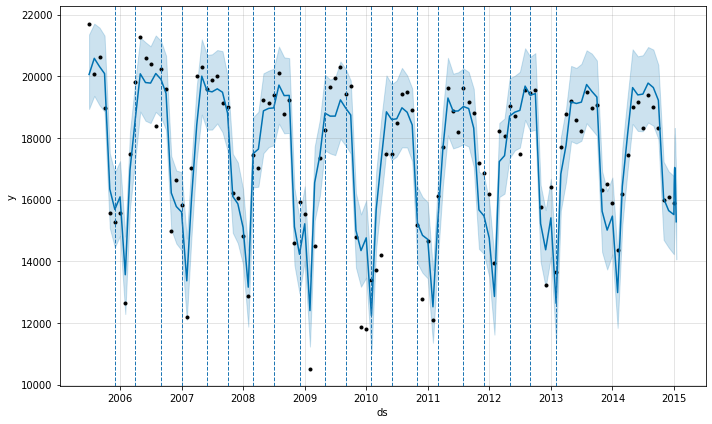

In [16]:
import matplotlib.pyplot as plt

figure = pro_change.plot(forecast)
for changepoint in pro_change.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [17]:
forecast_data

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2005-07-01  18498.943707  18777.129886  21350.867351  18498.943707   
1   2005-08-01  18470.154783  19372.945024  21790.066623  18470.154783   
2   2005-09-01  18441.365860  19094.678382  21534.270363  18441.365860   
3   2005-10-01  18413.505611  18811.873791  21236.759879  18413.505611   
4   2005-11-01  18384.716687  15058.229619  17551.893237  18384.716687   
..         ...           ...           ...           ...           ...   
125 2015-11-30  18086.998562  16719.528846  19146.698000  18057.497700   
126 2015-12-31  18104.021050  13556.325078  16086.385797  18069.268121   
127 2016-01-31  18121.043539  12898.651074  15334.538971  18081.068532   
128 2016-02-29  18136.967802  14366.088297  16865.410870  18092.931665   
129 2016-03-31  18153.990291  17584.206184  20038.046367  18104.664140   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    18498.943707     1560.793790           1560.793790           1560.793790   
1    18470.154783     2114.559620           2114.559620           2114.559620   
2    18441.365860     1876.150287           1876.150287           1876.150287   
3    18413.505611     1674.694005           1674.694005           1674.694005   
4    18384.716687    -2043.638346          -2043.638346          -2043.638346   
..            ...             ...                   ...                   ...   
125  18111.010542     -156.483027           -156.483027           -156.483027   
126  18132.632198    -3269.064054          -3269.064054          -3269.064054   
127  18154.456400    -3990.051118          -3990.051118          -3990.051118   
128  18173.906892    -2502.962019          -2502.962019          -2502.962019   
129  18195.079168      682.391079            682.391079            682.391079   

          yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    1560.793790   1560.793790   1560.793790                   0.0   
1    2114.559620   2114.559620   2114.559620                   0.0   
2    1876.150287   1876.150287   1876.150287                   0.0   
3    1674.694005   1674.694005   1674.694005                   0.0   
4   -2043.638346  -2043.638346  -2043.638346                   0.0   
..           ...           ...           ...                   ...   
125  -156.483027   -156.483027   -156.483027                   0.0   
126 -3269.064054  -3269.064054  -3269.064054                   0.0   
127 -3990.051118  -3990.051118  -3990.051118                   0.0   
128 -2502.962019  -2502.962019  -2502.962019                   0.0   
129   682.391079    682.391079    682.391079                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0  20059.737496  
1                           0.0                         0.0  20584.714403  
2                           0.0                         0.0  20317.516147  
3                           0.0                         0.0  20088.199615  
4                           0.0                         0.0  16341.078341  
..                          ...                         ...           ...  
125                         0.0                         0.0  17930.515535  
126                         0.0                         0.0  14834.956996  
127                         0.0                         0.0  14130.992420  
128                         0.0                         0.0  15634.005783  
129                         0.0                         0.0  18836.381370  

[130 rows x 16 columns]

In [18]:
yhat=forecast_data['yhat']

In [19]:
yhat

0      20059.737496
1      20584.714403
2      20317.516147
3      20088.199615
4      16341.078341
           ...     
125    17930.515535
126    14834.956996
127    14130.992420
128    15634.005783
129    18836.381370
Name: yhat, Length: 130, dtype: float64

In [20]:
yhat14=yhat[115:129]
yhat14

115    13822.835522
116    13676.787252
117    19224.926077
118    21154.888811
119    19925.062300
120    19837.336050
121    19147.644037
122    19435.223956
123    18007.817144
124    17489.940341
125    17930.515535
126    14834.956996
127    14130.992420
128    15634.005783
Name: yhat, dtype: float64

In [21]:
passenger_test=test_df['Adjusted Passenger Count']
passenger_test

115    14372
116    17304
117    19594
118    22075
119    21315
120    21078
121    22544
122    21341
123    22169
124    19800
125    17560
126    18397
127    16230
128    18392
Name: Adjusted Passenger Count, dtype: int64

In [22]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

mda(passenger_test, yhat14)

0.8571428571428571

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(passenger_test, yhat14)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2398.944404


In [24]:
forecast_error = (passenger_test-yhat14)
forecast_error

115     549.164478
116    3627.212748
117     369.073923
118     920.111189
119    1389.937700
120    1240.663950
121    3396.355963
122    1905.776044
123    4161.182856
124    2310.059659
125    -370.515535
126    3562.043004
127    2099.007580
128    2757.994217
dtype: float64

In [25]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

1994.1476982923311

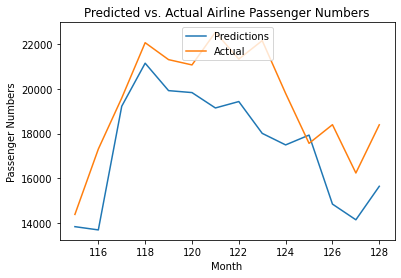

In [26]:
import matplotlib.pyplot as plt

predictons, =plt.plot(yhat14, label='Predictions')
actual, =plt.plot(passenger_test, label='Actual')
plt.xlabel('Month')
plt.ylabel('Passenger Numbers')
plt.title("Predicted vs. Actual Airline Passenger Numbers")
plt.legend(loc = 'upper center')
plt.show()

In [27]:
np.mean(passenger_test)

19440.785714285714